In [1]:
import config
from preprocessing import mappings, transforms, treebank_reader
from training import pcfg

config.train = treebank_reader.read(config.train_file, cutoff=True)

config.nonterminal_map = mappings.NonterminalMap(config.train)
config.terminal_map = mappings.TerminalMap(config.train, len(config.nonterminal_map))
transforms.transform_trees(config.train)
config.pcfg = pcfg.PCFG()
from training_ import netflix_reduced

100%|██████████| 39092/39092 [08:16<00:00, 78.75it/s] 


In [4]:
I = netflix_reduced.I
from sklearn.cluster import MiniBatchKMeans
from tqdm import tqdm

IDX = dict()
G = dict()
from sklearn.preprocessing import normalize
from scipy.sparse.linalg import svds
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
for nt in tqdm(config.pcfg.nonterminals, desc='Doing SVDs'):
    u, s, _ = svds(normalize(I[nt]), k=(config.max_state if I[nt].shape[0] > 1000 else 1), return_singular_vectors='u')
    i = -1
    # acc = s[i]
    while i - 1 >= -len(s) and s[i - 1] > 40:
        i -= 1
        # acc += s[i]
    G[nt] = u[:, i:]
    km = MiniBatchKMeans(n_clusters=abs(i), batch_size=500, max_no_improvement=20)
    print(config.nonterminal_map[nt], s[i:], abs(i))
    IDX[nt] = km.fit_predict(normalize(u[:, i:]))

Doing SVDs:   0%|          | 0/170 [00:00<?, ?it/s]

IN [ 40.89127317  46.25109778  46.80989051  48.96756027  55.92041073
  60.08909728  67.10527864  77.75220625 107.74928818 196.93121599] 10


Doing SVDs:   1%|          | 2/170 [00:01<01:44,  1.61it/s]

DT [ 41.67346951  48.09715849  82.27049336  96.70795157 121.02758923
 186.51516598] 6


Doing SVDs:   2%|▏         | 3/170 [00:01<01:39,  1.68it/s]

NNP [ 47.22582429  55.28476208  59.96732117  90.47398391 123.9642626
 144.98179437] 6
NP|<> [ 44.90786172  46.46808472  49.88799598  56.81231692  70.81781112
  77.38861733  93.84940054 115.27406245 140.0075524  147.22895048
 214.83111864] 11


Doing SVDs:   3%|▎         | 5/170 [00:02<01:29,  1.83it/s]

CD [44.75952057 55.3203302  57.04957643 60.28681428 75.17248217] 5


Doing SVDs:   4%|▎         | 6/170 [00:03<01:38,  1.66it/s]

NN [ 42.29982132  45.14815785  48.15277994  53.65067549  54.75583429
  75.44827365  79.32227702 132.41291206 192.91467394] 9
NP [ 42.46591657  44.31157309  45.7680352   48.39442032  49.50647066
  56.89475408  59.3821003   62.26996247  66.30104321  69.1659267
  72.92925925  79.09469234  82.10483939  83.13230437  96.16668963
  97.8845317  110.2959614  116.32798577 129.59126252 144.78878591
 161.08810864 239.34945727] 22


Doing SVDs:   5%|▌         | 9/170 [00:05<01:46,  1.52it/s]

`` [57.85362868] 1
'' [58.19007247] 1


Doing SVDs:   6%|▌         | 10/170 [00:05<01:23,  1.92it/s]

POS [82.12980945] 1


Doing SVDs:   6%|▋         | 11/170 [00:05<01:20,  1.98it/s]

PP [ 41.74368319  46.6403455   51.85369981  58.61818135  61.99229784
  66.64510843  77.76695782  93.87484428 220.49275741] 9
-LRB- [29.54091515] 1


Doing SVDs:   8%|▊         | 13/170 [00:06<00:58,  2.68it/s]

PRN|<> [32.22272838] 1


Doing SVDs:   8%|▊         | 14/170 [00:06<00:51,  3.00it/s]

VBN [46.97573241 78.41483906] 2


Doing SVDs:   9%|▉         | 15/170 [00:06<00:52,  2.98it/s]

NNS [ 41.5579813   50.15843433  66.31715419 130.45638341] 4


Doing SVDs:   9%|▉         | 16/170 [00:06<00:46,  3.33it/s]

VBP [42.63438559 63.46068282] 2
VP|<> [ 41.76510352  44.28790056  44.70670164  46.01733199  50.99468529
  55.70846913  70.17615081  78.92243066  83.03142232 125.64734576] 10


Doing SVDs:  10%|█         | 17/170 [00:07<00:57,  2.68it/s]

VP [ 42.09856217  47.02865611  56.6786429   60.75543251  63.22511982
  69.03060194  72.86042874  83.10929972  87.50348321  98.72375479
 105.60680015 119.10109203 161.00463088] 13


Doing SVDs:  11%|█         | 19/170 [00:08<01:08,  2.20it/s]

S [ 57.38775024  61.49369603  95.67282339 192.05545996] 4


Doing SVDs:  12%|█▏        | 20/170 [00:08<00:58,  2.54it/s]

, [ 45.81011677  52.50195997  63.89368062  96.61452309 154.54489982] 5
CC [ 52.14716016  61.0020166  100.17715006] 3


Doing SVDs:  12%|█▏        | 21/170 [00:08<00:49,  3.03it/s]

-RRB- [28.42118038] 1
PRN [36.34810123] 1


Doing SVDs:  14%|█▍        | 24/170 [00:09<00:41,  3.51it/s]

S|<> [ 45.886693    50.68289502  75.3306939  106.34431574 129.03707507
 180.91920283] 6


Doing SVDs:  15%|█▍        | 25/170 [00:09<00:35,  4.06it/s]

NP+NNP [47.64346267] 1


Doing SVDs:  15%|█▌        | 26/170 [00:09<00:36,  4.00it/s]

VBD [41.6232311  44.86163297 72.04466602 88.74573632] 4


Doing SVDs:  16%|█▌        | 27/170 [00:10<00:34,  4.09it/s]

ADVP+RB [52.85107535 55.90356933] 2
TO [ 42.17578221  57.88222843 109.58865594] 3


Doing SVDs:  17%|█▋        | 29/170 [00:10<00:30,  4.59it/s]

. [ 45.95682298 185.09547804] 2


Doing SVDs:  18%|█▊        | 30/170 [00:10<00:31,  4.43it/s]

VBZ [41.610536   52.98815863 82.55477081] 3
NNPS [24.96573682] 1


Doing SVDs:  19%|█▉        | 32/170 [00:10<00:26,  5.30it/s]

NP+PRP [45.2885957  51.26655516 63.80144913] 3
PRP$ [40.71068374 55.83344052] 2


Doing SVDs:  21%|██        | 36/170 [00:11<00:22,  5.92it/s]

VB [44.32070395 67.59680164 92.47888393] 3
ADJP+JJ [24.5483258] 1
QP [36.94039677] 1


Doing SVDs:  22%|██▏       | 38/170 [00:11<00:18,  7.16it/s]

NP+CD [30.01796245] 1
SBAR+S [55.142733] 1


Doing SVDs:  23%|██▎       | 39/170 [00:12<00:27,  4.78it/s]

JJ [ 46.25729249  52.61949336  73.59960499  75.6287933  139.18338385] 5


Doing SVDs:  25%|██▍       | 42/170 [00:12<00:21,  6.01it/s]

NP+NN [46.56821006] 1
PP|<> [35.76497073] 1
ADJP [44.0625022] 1


Doing SVDs:  26%|██▌       | 44/170 [00:12<00:19,  6.30it/s]

MD [61.31637584] 1
RB [58.19989114] 1
VP+VBN [23.8613921] 1
UCP|<> [15.18604843] 1
UCP [16.8092057] 1


Doing SVDs:  28%|██▊       | 48/170 [00:13<00:16,  7.49it/s]

NP+NNS [44.32922437] 1


Doing SVDs:  29%|██▉       | 49/170 [00:13<00:21,  5.63it/s]

VBG [51.73260321] 1


Doing SVDs:  29%|██▉       | 50/170 [00:13<00:24,  4.92it/s]

S+VP [40.28923715 46.58335046 56.10532843 84.00420821] 4
VP+VBP [12.10187251] 1
WHNP+IN [17.75564409] 1
SBAR|<> [22.29424257] 1


Doing SVDs:  34%|███▍      | 58/170 [00:13<00:13,  8.15it/s]

SBAR [56.6228375  80.57360167] 2
ADVP+RBR [8.24601049] 1
ADVP|<> [18.87005505] 1
RBR [19.15482608] 1
ADVP [34.48063662] 1
NP+JJ [11.03091439] 1


Doing SVDs:  36%|███▌      | 61/170 [00:14<00:11,  9.57it/s]

: [35.05061211] 1
SINV|<> [67.48958676] 1
VP+VBD [34.31586374] 1


Doing SVDs:  38%|███▊      | 65/170 [00:14<00:09, 11.43it/s]

SINV [42.03333764] 1
WHNP+WP [37.92974504] 1
WHNP+WDT [51.60205207] 1
JJR [24.54523651] 1
NP+NNPS [6.99744814] 1
PP+TO [4.52440492] 1
ADVP+RBS [4.60548338] 1


Doing SVDs:  44%|████▍     | 75/170 [00:14<00:05, 16.56it/s]

QP|<> [56.85139731] 1
NP+JJR [8.34885019] 1
RBS [15.64839136] 1
ADJP|<> [28.46494669] 1
FRAG [14.6085687] 1
NAC|<> [16.77505297] 1
NAC [15.99712376] 1
JJS [24.36981461] 1


Doing SVDs:  48%|████▊     | 81/170 [00:15<00:05, 17.66it/s]

$ [68.20575326] 1
NP+QP [52.35952556] 1
PRT+RP [35.40656347] 1
S+PP [3.98296923] 1
VP+VB [16.38023029] 1
S+NP [11.72456599] 1


Doing SVDs:  54%|█████▍    | 92/170 [00:15<00:03, 24.95it/s]

VP+VBZ [30.79247036] 1
RP [4.74886526] 1
NX [18.61273181] 1
FRAG|<> [17.27401978] 1
NX+NN [7.69285946] 1
PP+IN [7.86563903] 1
S+ADJP [6.90977859] 1
ADJP+RB [4.1154668] 1
WHPP [17.15055105] 1
FW [7.97805201] 1
SBAR+S+VP [30.26110695] 1
SBAR+SINV [4.61847077] 1


Doing SVDs:  60%|██████    | 102/170 [00:15<00:02, 31.55it/s]

NP+WDT [5.69079192] 1
NP+DT [21.92295677] 1
SQ|<> [14.02966379] 1
WHADVP+WRB [32.17903264] 1
SQ [13.02653912] 1
NX|<> [16.13387328] 1
SQ+VP [4.859666] 1
SBARQ|<> [9.24848841] 1
SBARQ [11.48383042] 1
NP+FW [3.05181381] 1


Doing SVDs:  69%|██████▉   | 118/170 [00:15<00:01, 44.24it/s]

S+ADJP+JJ [7.23962211] 1
WRB [9.78261344] 1
WHADVP [6.82407956] 1
NP+EX [21.76510668] 1
NP+RB [7.77363227] 1
CONJP [10.96047786] 1
ADJP+QP [24.04020816] 1
NP+JJS [11.42848518] 1
ADJP+JJR [8.12068194] 1
FRAG+NP [3.84843697] 1
NX+NNS [6.47054965] 1
PRP [5.44642321] 1
ADVP+JJR [3.61029613] 1
WHADJP [5.39959888] 1
NP+VB [3.88372312] 1


Doing SVDs:  79%|███████▉  | 134/170 [00:16<00:00, 56.08it/s]

VP+NN [3.65850964] 1
ADJP+VBN [5.03821769] 1
# [10.37649604] 1
VP+VBG [10.20087643] 1
WHNP [11.63851191] 1
CONJP|<> [10.79196978] 1
VP+JJ [2.77325374] 1
S+NP+NN [2.68646676] 1
NP+IN [5.11498585] 1
NP+VBG [5.64690145] 1
ADVP+RP [4.55316153] 1
PRN+S [4.26690607] 1
PDT [13.72842709] 1
PRT+RB [5.68848813] 1
ADJP+JJS [2.90985387] 1
ADVP+IN [6.83271082] 1


Doing SVDs:  90%|█████████ | 153/170 [00:16<00:00, 69.13it/s]

WDT [5.46517532] 1
INTJ+UH [4.48465082] 1
WP$ [10.25037288] 1
X [5.22657005] 1
NP+PRP$ [2.84988621] 1
S+VP+VBN [5.16982909] 1
WP [5.09389049] 1
FRAG+ADJP+JJ [3.13849101] 1
ADVP+NN [3.56971833] 1
S+NP+NNP [4.06798612] 1
S+VP+TO [3.66885979] 1
WHADVP+IN [4.8981869] 1
WHNP|<> [7.95317449] 1
S+VP+VBG [4.65226344] 1
RRC [4.58289971] 1
VP+PP [4.78628727] 1
WHNP+DT [6.69919815] 1
ADVP+JJ [4.72741047] 1
NX+NNP [3.51256927] 1


Doing SVDs: 100%|██████████| 170/170 [00:16<00:00, 10.32it/s]

ADJP+VBG [2.6555572] 1
VP+MD [4.46849862] 1
WHADVP|<> [3.23892941] 1
NP+RBR [3.59070379] 1
ADVP+NNP [4.10959636] 1
ADVP+DT [3.26146522] 1
X|<> [5.40613235] 1
ADJP+RBR [2.59076751] 1
X+SYM [2.70020513] 1
PRT+IN [5.54161678] 1
UH [3.01099918] 1
INTJ [2.64036995] 1
ADJP+NN [2.24784447] 1
LS [3.55087813] 1
LST [3.89656196] 1


In [7]:
from collections import Counter
cnt = Counter()
for tree in tqdm(config.train):
    for node in tree.postorder():
        nt = node.label()
        node.set_label(config.nonterminal_map[nt] + '-'+str(IDX[nt][cnt[nt]]))
        if len(node) == 1:
            node[0] = config.terminal_map[node[0]]
        cnt[nt] += 1

100%|██████████| 39092/39092 [00:10<00:00, 3898.88it/s]


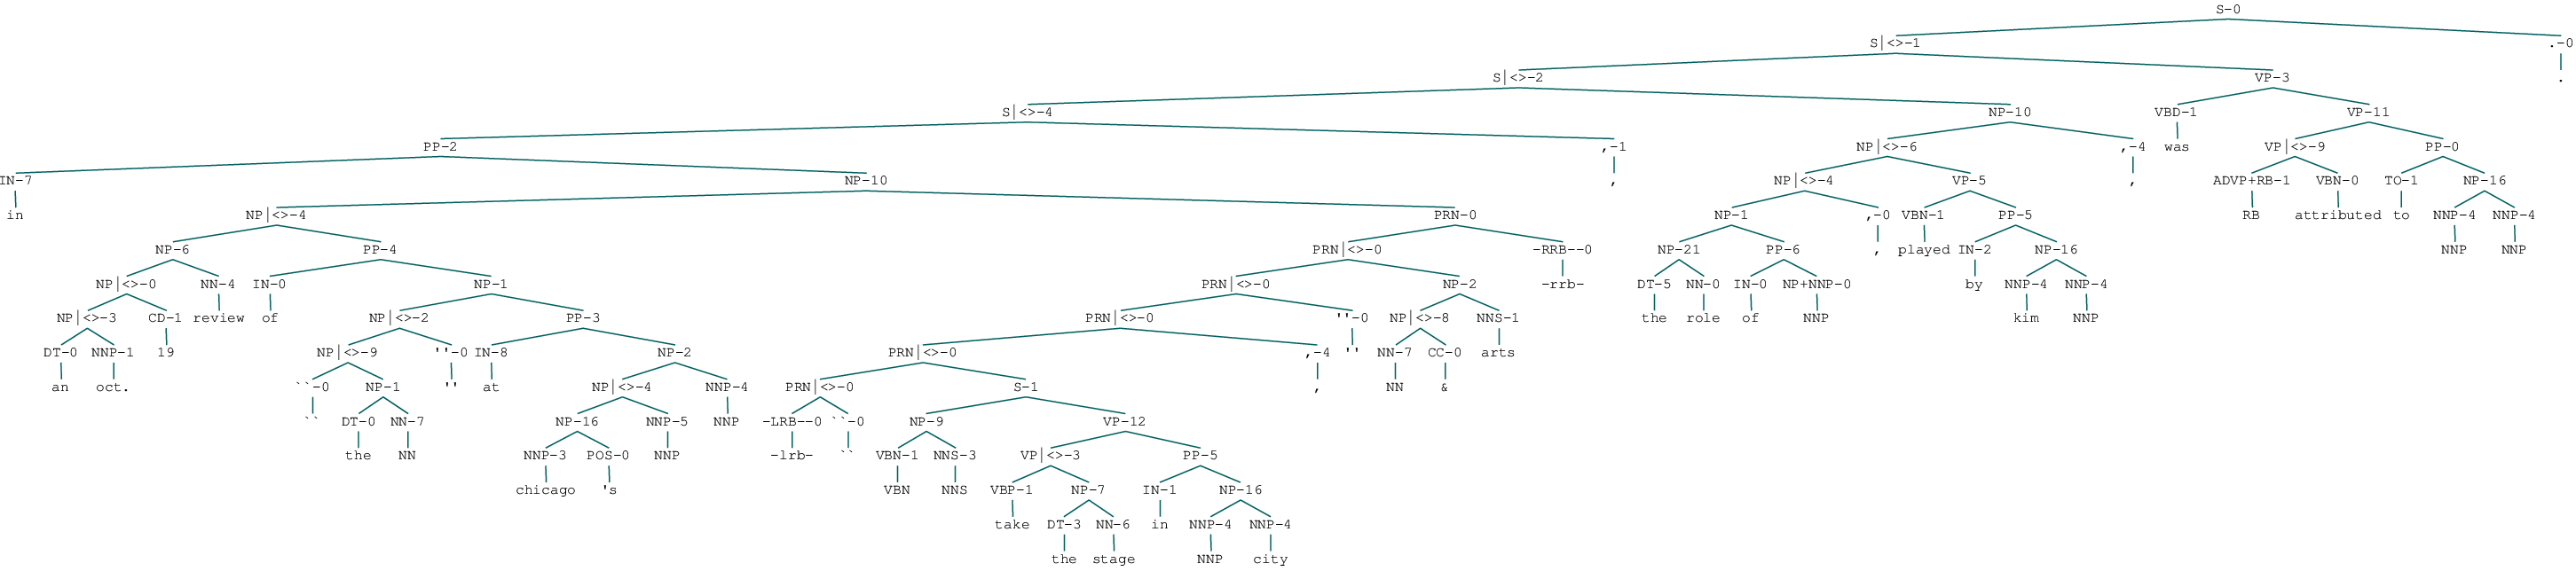

In [8]:
config.train[0]

In [2]:
len(config.pcfg.rule3s)

6497

In [3]:
len(config.pcfg.rule1s)

25145

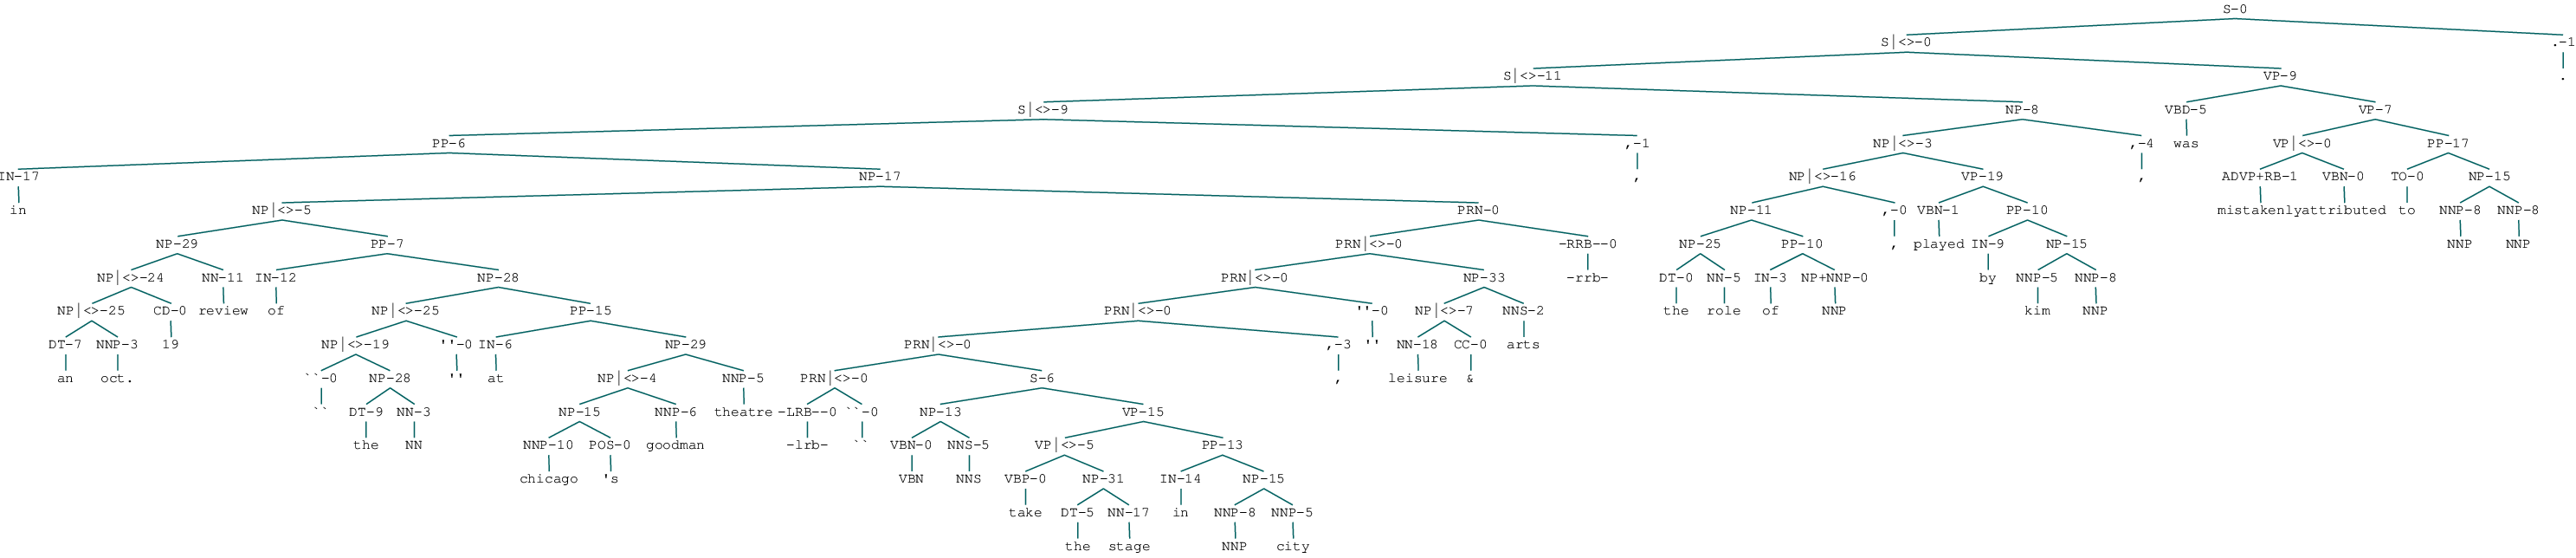

In [2]:
config.train[0]

In [2]:
netflix.G[config.nonterminal_map['NP']]

array([[ 8.69038414e-04,  3.05796737e-03, -6.31521323e-04,
        -1.13380819e-03,  2.20997680e-03],
       [-1.47948078e-03,  8.28774387e-04, -1.94442129e-03,
         7.29079635e-04,  1.08354418e-03],
       [-1.47702926e-03,  3.57419141e-03,  1.09078006e-04,
        -1.09413794e-03,  1.19516541e-03],
       ...,
       [-2.81710637e-03, -1.41309641e-03, -1.74610206e-03,
         8.03552982e-04,  1.52525720e-03],
       [ 1.60323017e-03, -1.22219239e-03,  8.21192604e-05,
        -4.48942914e-04,  1.77244682e-03],
       [ 1.75991730e-03, -1.23447506e-03,  6.72254494e-04,
        -1.33913693e-04,  1.65965398e-03]])

In [15]:
from collections import Counter

In [16]:
Counter(netflix.IDX[config.nonterminal_map['NP']]).most_common()

KeyError: 'NP'

In [4]:
from sklearn.cluster import MiniBatchKMeans
km = MiniBatchKMeans(n_clusters=32)
G = netflix.G[config.nonterminal_map['NP']]
xx = km.fit_predict(G)

In [5]:
import numpy as np

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
yy = pca.fit_transform(G)

In [7]:
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt

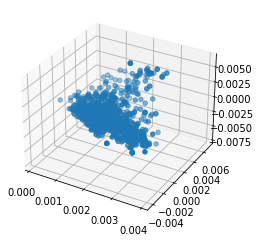

In [8]:
ax = plt.axes(projection='3d')

ax.scatter3D(G[:1000,-1], G[:1000,-2], G[:1000,-3]);

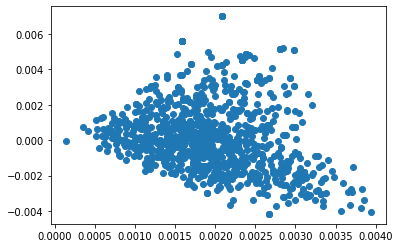

In [9]:
plt.scatter(G[:1000,-1], G[:1000,-2])#, c=netflix.IDX[config.nonterminal_map['NP']][:1000])

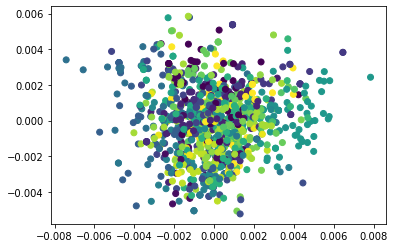

In [10]:
plt.scatter(yy[:1000,0], yy[:1000,1], c=xx[:1000])

In [9]:
from training_.pcfg_t import PCFGT
from training_.mappings_t import NonterminalMap, TerminalMap
from training_.transforms_t import transform_trees
config.nonterminal_map = NonterminalMap(config.train)
config.terminal_map = TerminalMap(config.train, len(config.nonterminal_map))
transforms.transform_trees(config.train)

Transform from strs to ints: 100%|██████████| 39092/39092 [00:06<00:00, 6477.80it/s]


In [10]:
# import importlib
# importlib.reload(pcfg_t)
from training_ import pcfg_t
config.pcfg = pcfg_t.PCFGT()

In [11]:
len(config.pcfg.rule3s)

24072

In [12]:
len(config.pcfg.rule1s)

47149

In [13]:
import training.lookup

In [14]:
config.save()

Saving parameters.
Done!


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
len(config.pcfg.rule3s.values())

6497

In [5]:
len(pcfgt.rule3s.values())

NameError: name 'pcfgt' is not defined

In [4]:
from collections import defaultdict, Counter

In [5]:
nt = Counter()
r3 = Counter()
r1 = Counter()

In [6]:
for tree in config.train:
    for node in tree.postorder():
        nt[node.label()] += 1
        if len(node) == 2:
            r3[(node.label(), node[0].label(), node[1].label())] += 1
        else:
            r1[(node.label(), node[0])] += 1

In [8]:
sorted(nt.items(), key=lambda x: x[0])

[('$-0', 283),
 ("''-0", 217),
 (',-0', 1628),
 ('-LRB--0', 39),
 ('-RRB--0', 37),
 ('.-0', 1348),
 (':-0', 153),
 ('ADJP+JJ-0', 87),
 ('ADJP+QP-0', 16),
 ('ADJP-0', 322),
 ('ADJP|<>-0', 82),
 ('ADVP+RB-0', 441),
 ('ADVP+RBR-0', 16),
 ('ADVP-0', 210),
 ('ADVP|<>-0', 25),
 ('CC-0', 746),
 ('CD-0', 1372),
 ('DT-0', 646),
 ('DT-1', 1998),
 ('IN-0', 618),
 ('IN-1', 303),
 ('IN-2', 2186),
 ('JJ-0', 1815),
 ('JJR-0', 87),
 ('JJS-0', 63),
 ('MD-0', 247),
 ('NAC-0', 23),
 ('NAC|<>-0', 39),
 ('NN-0', 221),
 ('NN-1', 258),
 ('NN-2', 1787),
 ('NN-3', 360),
 ('NN-4', 59),
 ('NN-5', 145),
 ('NN-6', 2),
 ('NN-7', 1229),
 ('NNP-0', 1542),
 ('NNP-1', 1322),
 ('NNS-0', 1535),
 ('NP+CD-0', 142),
 ('NP+DT-0', 64),
 ('NP+EX-0', 27),
 ('NP+NN-0', 448),
 ('NP+NNP-0', 429),
 ('NP+NNS-0', 384),
 ('NP+PRP-0', 454),
 ('NP+QP-0', 218),
 ('NP-0', 513),
 ('NP-1', 8),
 ('NP-10', 64),
 ('NP-12', 188),
 ('NP-13', 15),
 ('NP-14', 89),
 ('NP-15', 273),
 ('NP-16', 157),
 ('NP-17', 276),
 ('NP-18', 35),
 ('NP-19', 83),
 

In [77]:
ink = []
for tree in config.train:
    for node in tree.postorder():
        if 'JJ-0' == node.label():
            ink.append(node)

In [76]:
from training_.transforms_t import inverse_transform_trees
inverse_transform_trees(config.train)

Inverse transform from ints to strs: 100%|██████████| 39092/39092 [00:05<00:00, 6700.79it/s]


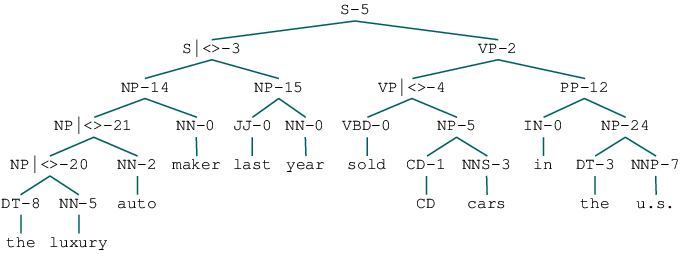

In [78]:
ink[0].parent().parent().parent()

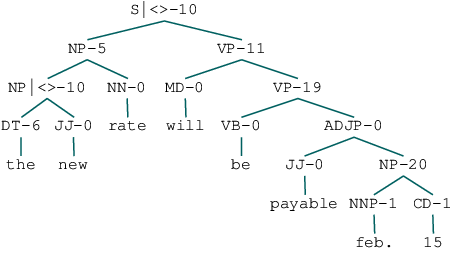

In [79]:
ink[1].parent().parent().parent()

In [41]:
ink1 = []
for tree in config.train:
    for node in tree.postorder():
        if 'NP-11' == node.label():
            ink1.append(node)

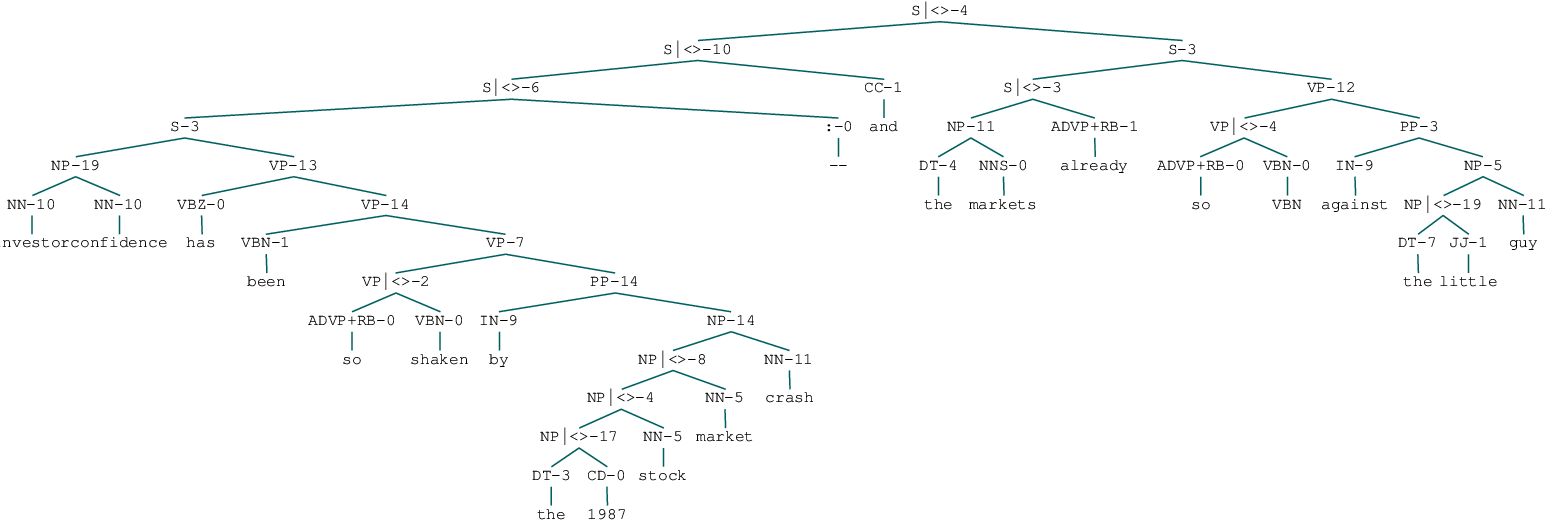

In [45]:
ink1[2].parent().parent().parent()

In [25]:
len(r3)

59797

In [26]:
len(r1)

66695